In [3]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Dataset  (1).csv")
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
m = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

In [5]:
for idx, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=row['Restaurant Name']).add_to(marker_cluster)

In [6]:
m.save('restaurants_map.html')

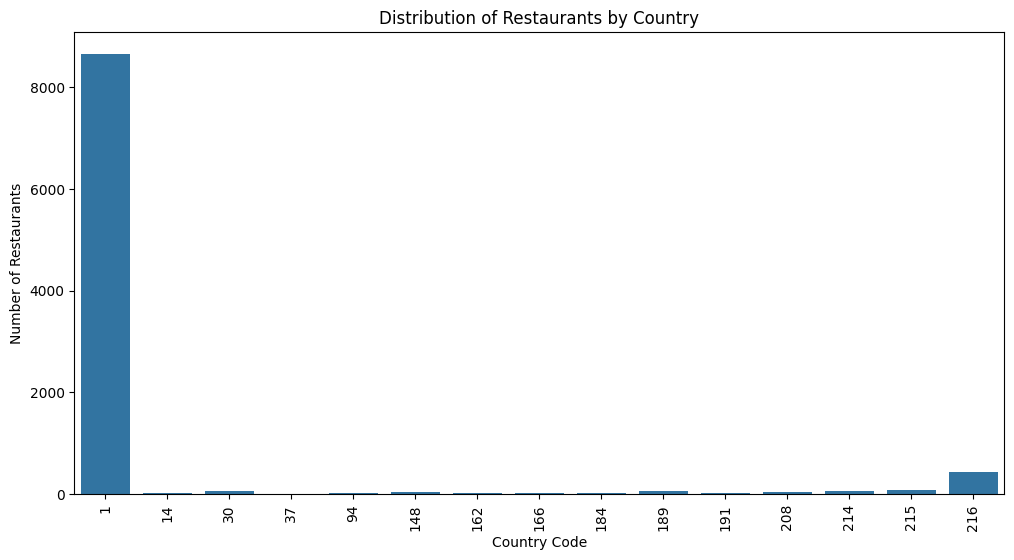

In [9]:
# Distribution of restaurants by country
country_distribution = df['Country Code'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values)
plt.title('Distribution of Restaurants by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

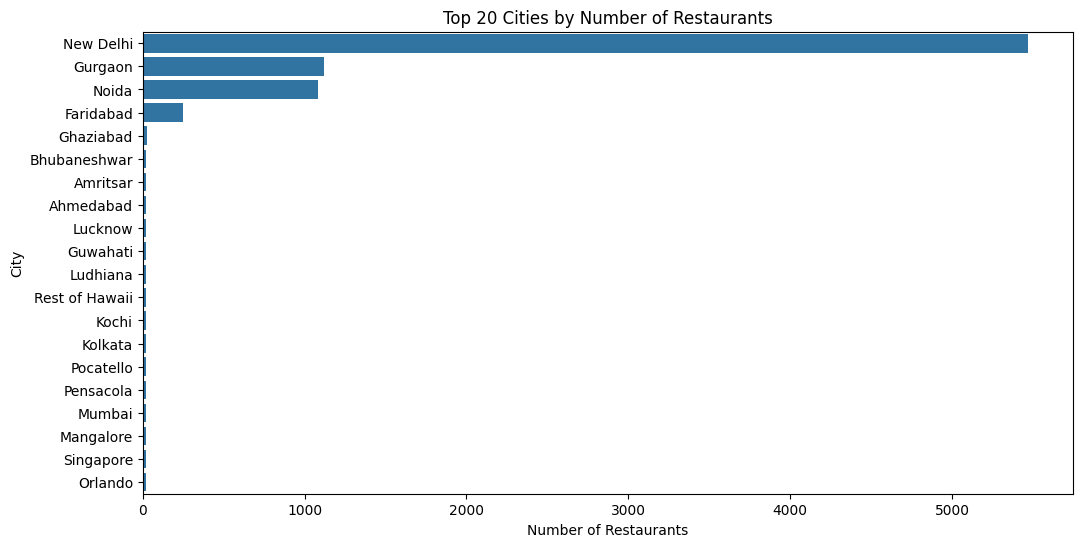

In [10]:
# Distribution of restaurants by city
city_distribution = df['City'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_distribution.values, y=city_distribution.index)
plt.title('Top 20 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

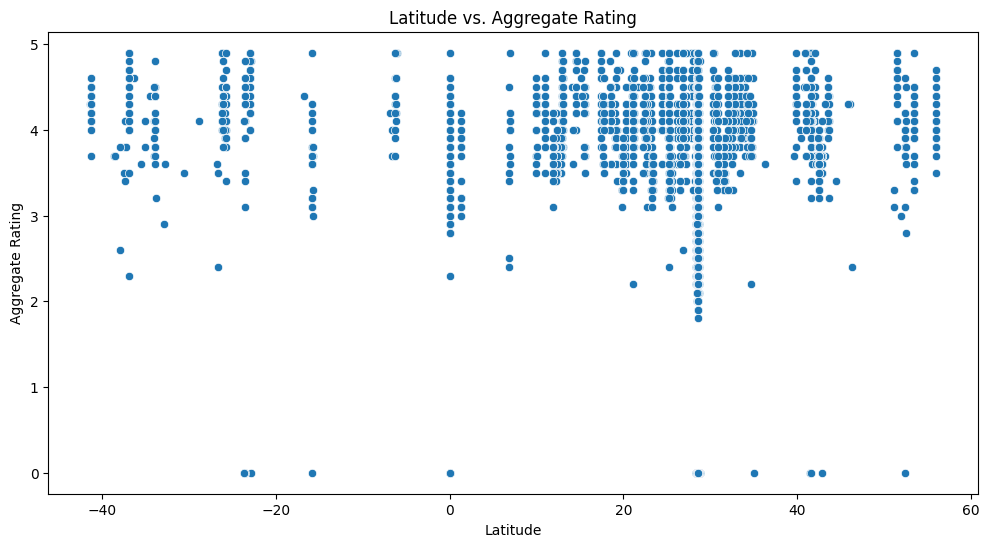

In [11]:
# Correlation between location and rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Latitude', y='Aggregate rating', data=df)
plt.title('Latitude vs. Aggregate Rating')
plt.xlabel('Latitude')
plt.ylabel('Aggregate Rating')
plt.show()

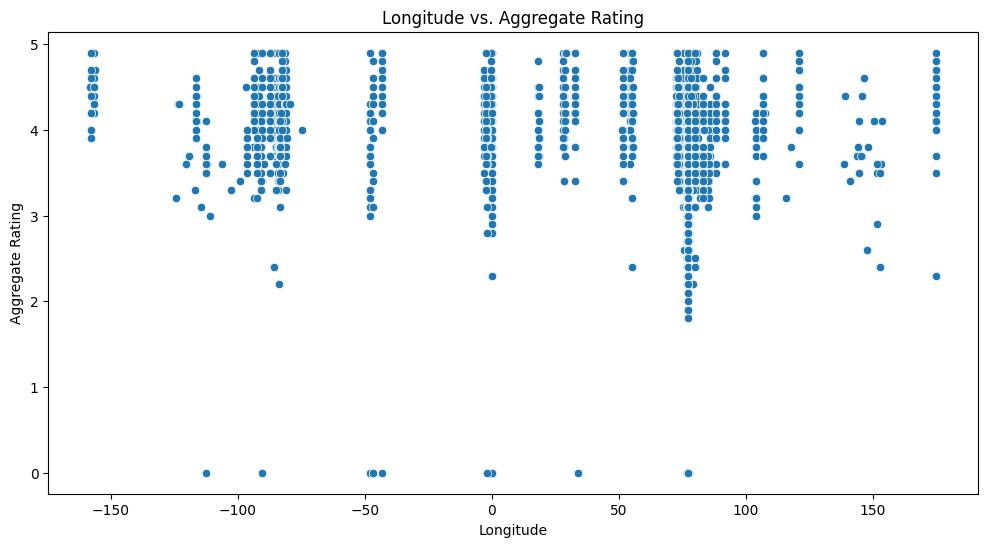

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Aggregate rating', data=df)
plt.title('Longitude vs. Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Aggregate Rating')
plt.show()

In [13]:
latitude_correlation = df['Latitude'].corr(df['Aggregate rating'])
longitude_correlation = df['Longitude'].corr(df['Aggregate rating'])

print(f'Correlation between Latitude and Aggregate rating: {latitude_correlation}')
print(f'Correlation between Longitude and Aggregate rating: {longitude_correlation}')


Correlation between Latitude and Aggregate rating: 0.0005155806902359908
Correlation between Longitude and Aggregate rating: -0.11681757734540431
